In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [5]:
nbfc=pd.read_excel("data.xlsx")

In [6]:
nbfc.head()

,AGREEMENTID,AUTHORIZATIONDATE,BALANCE_EXCESS,BALANCE_TENURE,CITY,COMPLETED_TENURE,CURRENT_INTEREST_RATE,CURRENT_INTEREST_RATE_MAX,CURRENT_INTEREST_RATE_MIN,CURRENT_INTEREST_RATE_CHANGES,...,PAID_PRINCIPAL,PRE_EMI_DUEAMT,PRE_EMI_OS_AMOUNT,PRE_EMI_RECEIVED_AMT,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB,FORECLOSURE
0,11220001,2010-08-29,0.0,0,MUMBAI,45,13.421934,13.734072,13.421934,1,...,1.159366e+07,7994.273589,0.0,7994.273589,HL,10901100.0,NaN,NaN,45,1
1,11220002,2010-09-15,0.0,99,MUMBAI,38,13.734072,13.734072,13.734072,0,...,6.942656e+06,100504.575864,0.0,100504.575864,HL,10901100.0,NaN,NaN,38,1
2,11220006,2010-11-02,0.0,231,MUMBAI,81,15.606900,16.231176,15.606900,2,...,9.392115e+05,5947.630536,0.0,5947.630536,HL,10901101.0,NaN,NaN,81,1
3,11220008,2010-10-06,0.0,0,THANE,91,11.236968,13.734072,11.236968,4,...,9.979637e+06,60322.180776,0.0,60322.180776,HL,10901100.0,NaN,NaN,91,1
4,11220010,2010-10-26,0.0,215,MUMBAI,89,14.982624,15.606900,14.982624,2,...,5.552847e+05,27732.787464,0.0,27732.787464,HL,10901101.0,NaN,NaN,90,1


<AxesSubplot:ylabel='FORECLOSURE'>

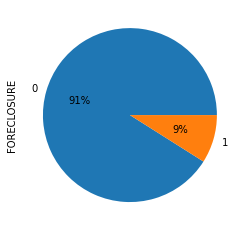

In [7]:
nbfc.FORECLOSURE.value_counts().plot(kind="pie",autopct="%1.0f%%")

In [8]:
nbfc.shape

(20012, 53)

In [9]:
nbfc.isnull().sum()

AGREEMENTID                                0
AUTHORIZATIONDATE                          0
BALANCE_EXCESS                             0
BALANCE_TENURE                             0
CITY                                       0
COMPLETED_TENURE                           0
CURRENT_INTEREST_RATE                      0
CURRENT_INTEREST_RATE_MAX                  0
CURRENT_INTEREST_RATE_MIN                  0
CURRENT_INTEREST_RATE_CHANGES              0
CURRENT_TENOR                              0
CUSTOMERID                               281
DIFF_AUTH_INT_DATE                         0
DIFF_CURRENT_INTEREST_RATE_MAX_MIN         0
DIFF_EMI_AMOUNT_MAX_MIN                   89
DIFF_ORIGINAL_CURRENT_INTEREST_RATE        0
DIFF_ORIGINAL_CURRENT_TENOR                0
DPD                                        0
DUEDAY                                     0
EMI_AMOUNT                                 0
EMI_DUEAMT                                 0
EMI_OS_AMOUNT                              0
EMI_RECEIV

In [10]:
processed=nbfc.drop(['AGREEMENTID','CITY','CUSTOMERID','SCHEMEID','PRODUCT','MOB','NPA_IN_LAST_MONTH','NPA_IN_CURRENT_MONTH','LATEST_TRANSACTION_MONTH','DPD','EMI_AMOUNT','NET_LTV'],axis=1)

In [11]:
processed.shape

(20012, 41)

In [12]:
processed=processed.dropna()

In [13]:
processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19765 entries, 0 to 20011
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   AUTHORIZATIONDATE                    19765 non-null  datetime64[ns]
 1   BALANCE_EXCESS                       19765 non-null  float64       
 2   BALANCE_TENURE                       19765 non-null  int64         
 3   COMPLETED_TENURE                     19765 non-null  int64         
 4   CURRENT_INTEREST_RATE                19765 non-null  float64       
 5   CURRENT_INTEREST_RATE_MAX            19765 non-null  float64       
 6   CURRENT_INTEREST_RATE_MIN            19765 non-null  float64       
 7   CURRENT_INTEREST_RATE_CHANGES        19765 non-null  int64         
 8   CURRENT_TENOR                        19765 non-null  int64         
 9   DIFF_AUTH_INT_DATE                   19765 non-null  int64         
 10  DIFF_CURRE

In [14]:
processed.isnull().sum()

AUTHORIZATIONDATE                      0
BALANCE_EXCESS                         0
BALANCE_TENURE                         0
COMPLETED_TENURE                       0
CURRENT_INTEREST_RATE                  0
CURRENT_INTEREST_RATE_MAX              0
CURRENT_INTEREST_RATE_MIN              0
CURRENT_INTEREST_RATE_CHANGES          0
CURRENT_TENOR                          0
DIFF_AUTH_INT_DATE                     0
DIFF_CURRENT_INTEREST_RATE_MAX_MIN     0
DIFF_EMI_AMOUNT_MAX_MIN                0
DIFF_ORIGINAL_CURRENT_INTEREST_RATE    0
DIFF_ORIGINAL_CURRENT_TENOR            0
DUEDAY                                 0
EMI_DUEAMT                             0
EMI_OS_AMOUNT                          0
EMI_RECEIVED_AMT                       0
EXCESS_ADJUSTED_AMT                    0
EXCESS_AVAILABLE                       0
FOIR                                   0
INTEREST_START_DATE                    0
LAST_RECEIPT_AMOUNT                    0
LAST_RECEIPT_DATE                      0
LOAN_AMT        

In [15]:
processed.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
BALANCE_EXCESS,19765.0,78401.55,1349202.94,0.00,0.00,0.00,64.05,7.555600e+07
BALANCE_TENURE,19765.0,173.29,63.70,0.00,136.00,174.00,216.00,6.740000e+02
COMPLETED_TENURE,19765.0,17.31,16.45,0.00,6.00,12.00,25.00,9.800000e+01
CURRENT_INTEREST_RATE,19765.0,14.79,2.48,10.43,12.80,14.55,16.23,2.510000e+01
CURRENT_INTEREST_RATE_MAX,19765.0,14.90,2.48,10.43,13.11,14.67,16.54,3.746000e+01
CURRENT_INTEREST_RATE_MIN,19765.0,14.30,2.67,-5.06,12.42,13.73,16.17,2.403000e+01
CURRENT_INTEREST_RATE_CHANGES,19765.0,0.76,1.14,0.00,0.00,0.00,2.00,9.000000e+00
CURRENT_TENOR,19765.0,190.60,58.25,6.00,167.00,180.00,228.00,7.130000e+02
DIFF_AUTH_INT_DATE,19765.0,0.01,0.57,-17.00,0.00,0.00,0.00,7.000000e+01
DIFF_CURRENT_INTEREST_RATE_MAX_MIN,19765.0,0.60,0.97,0.00,0.00,0.00,1.19,2.435000e+01


In [ ]:
sns.pairplot(processed[['PAID_PRINCIPAL','BALANCE_EXCESS']])

KeyboardInterrupt: 

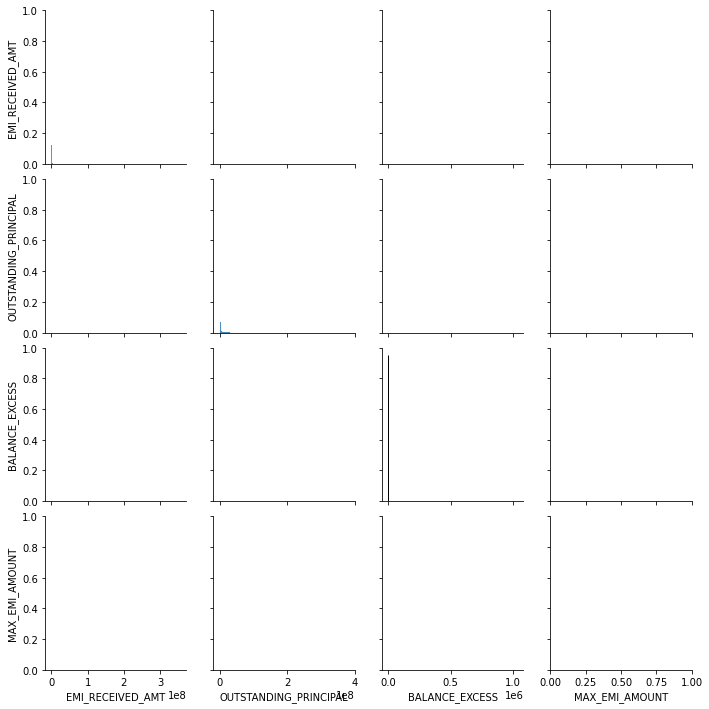

In [16]:
#-------------------------------- Scatter Graph --------------------------------

# axs=plt.subplots(4,2)

# axs[0,0]=plt.scatter(x=nbfc['CURRENT_INTEREST_RATE'],y=nbfc['DIFF_ORIGINAL_CURRENT_TENOR'])
# axs[0,0]=plt.xlabel('CURRENT_INTEREST_RATE')
# axs[0,0]=plt.ylabel('CURRENT_INTEREST_RATE')

#-------------------------------- Pair Plot --------------------------------
sns.pairplot(processed[['EMI_RECEIVED_AMT','OUTSTANDING_PRINCIPAL','BALANCE_EXCESS','MAX_EMI_AMOUNT']])

/var/folders/hq/z3ynr9610dv36r6l94s08jpc0000gn/T/ipykernel_24168/1108248762.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(processed.corr(), dtype=np.bool))


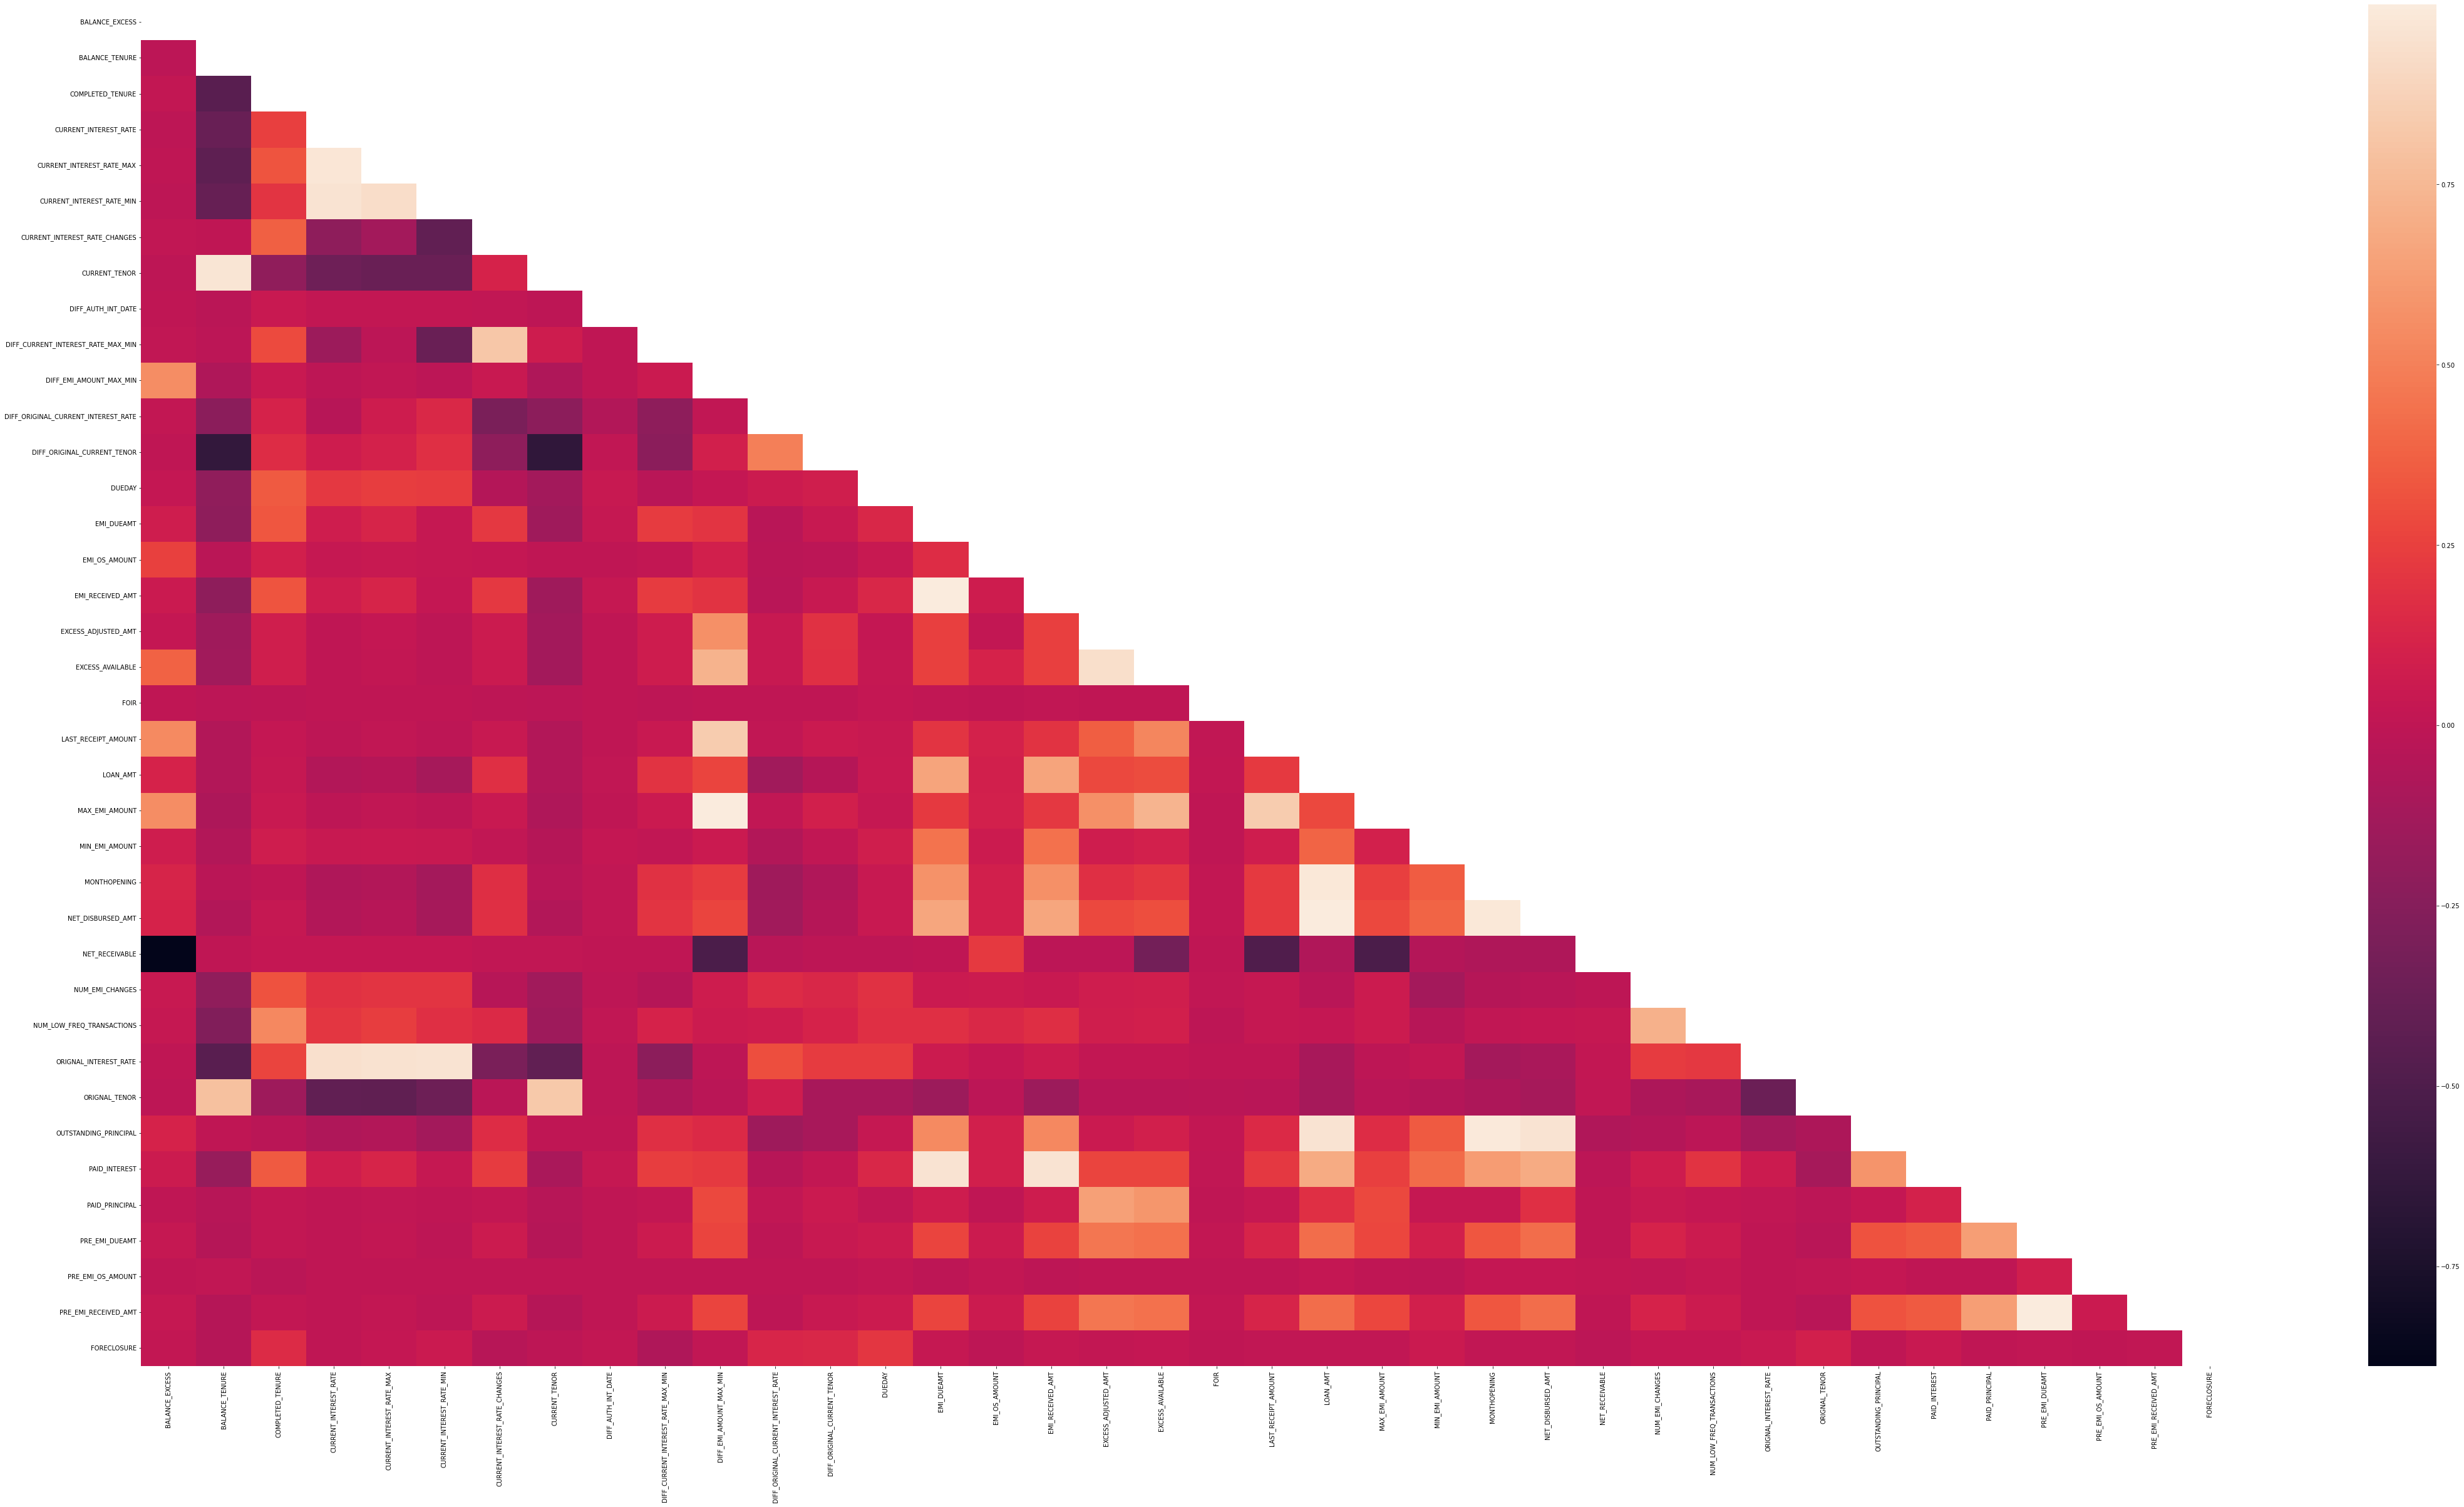

In [17]:
#-------------------------------- Correlation Matrix --------------------------------
plt.figure(figsize = (75,40))
mask = np.triu(np.ones_like(processed.corr(), dtype=np.bool))
# sns.heatmap(processed.corr(),annot=True)
sns.heatmap(processed.corr(),mask=mask)
plt.savefig('corr_matrix.png', dpi=300, bbox_inches='tight')

In [18]:
processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19765 entries, 0 to 20011
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   AUTHORIZATIONDATE                    19765 non-null  datetime64[ns]
 1   BALANCE_EXCESS                       19765 non-null  float64       
 2   BALANCE_TENURE                       19765 non-null  int64         
 3   COMPLETED_TENURE                     19765 non-null  int64         
 4   CURRENT_INTEREST_RATE                19765 non-null  float64       
 5   CURRENT_INTEREST_RATE_MAX            19765 non-null  float64       
 6   CURRENT_INTEREST_RATE_MIN            19765 non-null  float64       
 7   CURRENT_INTEREST_RATE_CHANGES        19765 non-null  int64         
 8   CURRENT_TENOR                        19765 non-null  int64         
 9   DIFF_AUTH_INT_DATE                   19765 non-null  int64         
 10  DIFF_CURRE

In [19]:
processed_dum=pd.get_dummies(processed,drop_first=True)

In [20]:
processed_dum

,AUTHORIZATIONDATE,BALANCE_EXCESS,BALANCE_TENURE,COMPLETED_TENURE,CURRENT_INTEREST_RATE,CURRENT_INTEREST_RATE_MAX,CURRENT_INTEREST_RATE_MIN,CURRENT_INTEREST_RATE_CHANGES,CURRENT_TENOR,DIFF_AUTH_INT_DATE,...,NUM_LOW_FREQ_TRANSACTIONS,ORIGNAL_INTEREST_RATE,ORIGNAL_TENOR,OUTSTANDING_PRINCIPAL,PAID_INTEREST,PAID_PRINCIPAL,PRE_EMI_DUEAMT,PRE_EMI_OS_AMOUNT,PRE_EMI_RECEIVED_AMT,FORECLOSURE
0,2010-08-29,0.0,0,45,13.421934,13.734072,13.421934,1,45,1,...,1,10.612692,120,1.164472e+05,2.725723e+06,1.159366e+07,7994.273589,0.0,7994.273589,1
1,2010-09-15,0.0,99,38,13.734072,13.734072,13.734072,0,137,0,...,0,10.612692,180,1.234760e+07,4.945154e+06,6.942656e+06,100504.575864,0.0,100504.575864,1
2,2010-11-02,0.0,231,81,15.606900,16.231176,15.606900,2,312,-1,...,3,11.549106,180,2.994184e+06,2.990124e+06,9.392115e+05,5947.630536,0.0,5947.630536,1
3,2010-10-06,0.0,0,91,11.236968,13.734072,11.236968,4,91,0,...,8,10.612692,180,4.295120e+04,4.648994e+06,9.979637e+06,60322.180776,0.0,60322.180776,1
4,2010-10-26,0.0,215,89,14.982624,15.606900,14.982624,2,304,0,...,3,10.924830,180,7.200653e+06,6.593778e+06,5.552847e+05,27732.787464,0.0,27732.787464,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20007,2015-06-30,0.0,240,0,13.421934,13.421934,13.421934,0,240,0,...,1,13.421934,240,9.251147e+06,1.381342e+04,0.000000e+00,20320.886952,0.0,20320.886952,0
20008,2015-06-29,0.0,240,0,13.109796,13.109796,13.109796,0,240,0,...,0,13.109796,240,2.299951e+06,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0
20009,2015-07-31,0.0,96,0,15.606900,15.606900,15.606900,0,96,0,...,0,15.606900,96,2.101814e+07,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0
20010,2015-08-31,0.0,60,0,15.606900,15.606900,15.606900,0,60,0,...,0,15.606900,60,6.162378e+07,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0


In [21]:
#-------------------------------- Conversion of datetime column into ordinal format --------------------------------
date_col=['AUTHORIZATIONDATE','INTEREST_START_DATE','LAST_RECEIPT_DATE']
import datetime as dt
for i in date_col:
    processed_dum[i]=pd.to_datetime(processed[i])
    processed_dum[i]=processed_dum[i].map(dt.datetime.toordinal)

In [22]:
processed_dum

,AUTHORIZATIONDATE,BALANCE_EXCESS,BALANCE_TENURE,COMPLETED_TENURE,CURRENT_INTEREST_RATE,CURRENT_INTEREST_RATE_MAX,CURRENT_INTEREST_RATE_MIN,CURRENT_INTEREST_RATE_CHANGES,CURRENT_TENOR,DIFF_AUTH_INT_DATE,...,NUM_LOW_FREQ_TRANSACTIONS,ORIGNAL_INTEREST_RATE,ORIGNAL_TENOR,OUTSTANDING_PRINCIPAL,PAID_INTEREST,PAID_PRINCIPAL,PRE_EMI_DUEAMT,PRE_EMI_OS_AMOUNT,PRE_EMI_RECEIVED_AMT,FORECLOSURE
0,734013,0.0,0,45,13.421934,13.734072,13.421934,1,45,1,...,1,10.612692,120,1.164472e+05,2.725723e+06,1.159366e+07,7994.273589,0.0,7994.273589,1
1,734030,0.0,99,38,13.734072,13.734072,13.734072,0,137,0,...,0,10.612692,180,1.234760e+07,4.945154e+06,6.942656e+06,100504.575864,0.0,100504.575864,1
2,734078,0.0,231,81,15.606900,16.231176,15.606900,2,312,-1,...,3,11.549106,180,2.994184e+06,2.990124e+06,9.392115e+05,5947.630536,0.0,5947.630536,1
3,734051,0.0,0,91,11.236968,13.734072,11.236968,4,91,0,...,8,10.612692,180,4.295120e+04,4.648994e+06,9.979637e+06,60322.180776,0.0,60322.180776,1
4,734071,0.0,215,89,14.982624,15.606900,14.982624,2,304,0,...,3,10.924830,180,7.200653e+06,6.593778e+06,5.552847e+05,27732.787464,0.0,27732.787464,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20007,735779,0.0,240,0,13.421934,13.421934,13.421934,0,240,0,...,1,13.421934,240,9.251147e+06,1.381342e+04,0.000000e+00,20320.886952,0.0,20320.886952,0
20008,735778,0.0,240,0,13.109796,13.109796,13.109796,0,240,0,...,0,13.109796,240,2.299951e+06,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0
20009,735810,0.0,96,0,15.606900,15.606900,15.606900,0,96,0,...,0,15.606900,96,2.101814e+07,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0
20010,735841,0.0,60,0,15.606900,15.606900,15.606900,0,60,0,...,0,15.606900,60,6.162378e+07,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0


In [23]:
Y=processed_dum['FORECLOSURE']
X=processed_dum.drop('FORECLOSURE',axis=1)

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [25]:
X_train

,AUTHORIZATIONDATE,BALANCE_EXCESS,BALANCE_TENURE,COMPLETED_TENURE,CURRENT_INTEREST_RATE,CURRENT_INTEREST_RATE_MAX,CURRENT_INTEREST_RATE_MIN,CURRENT_INTEREST_RATE_CHANGES,CURRENT_TENOR,DIFF_AUTH_INT_DATE,...,NUM_EMI_CHANGES,NUM_LOW_FREQ_TRANSACTIONS,ORIGNAL_INTEREST_RATE,ORIGNAL_TENOR,OUTSTANDING_PRINCIPAL,PAID_INTEREST,PAID_PRINCIPAL,PRE_EMI_DUEAMT,PRE_EMI_OS_AMOUNT,PRE_EMI_RECEIVED_AMT
18941,736967,0.000000,178,2,10.987258,10.987258,10.987258,0,180,0,...,2,1,10.987258,180,1.493187e+07,2.382466e+05,81086.487454,2.699513e+04,0.0,2.699513e+04
11892,736694,0.000000,108,0,19.602266,19.602266,19.602266,0,108,0,...,0,0,19.602266,108,2.552203e+06,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000e+00
10127,736594,1716.265759,166,14,19.602266,19.602266,19.602266,0,180,0,...,7,7,19.602266,180,3.145479e+06,5.001552e+05,52416.241561,2.667268e+04,0.0,2.667268e+04
11428,736663,0.000000,353,12,17.354873,17.354873,16.168748,2,365,0,...,1,2,16.168748,240,3.493036e+06,4.682977e+05,32156.254740,9.328924e+03,0.0,9.328924e+03
9110,736510,253.983480,202,17,14.857769,14.857769,13.109796,2,219,0,...,2,2,13.109796,180,4.373221e+06,6.857634e+05,175705.655249,9.759591e+03,0.0,9.759591e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11106,736663,0.000000,86,13,12.110954,12.110954,10.924830,2,99,0,...,2,6,10.924830,180,5.067537e+06,4.859890e+05,582861.580096,0.000000e+00,0.0,0.000000e+00
17517,736906,1371.510792,362,4,15.919038,15.919038,14.670486,1,366,0,...,2,2,14.670486,240,1.572489e+06,6.703436e+04,3871.841868,3.785458e+03,0.0,3.785458e+03
5293,736023,1.104276,178,33,16.730597,16.730597,14.982624,2,211,0,...,2,3,14.982624,180,4.977705e+06,1.738385e+06,400769.412514,1.318726e+04,0.0,1.318726e+04
12333,736694,2519.957832,180,0,12.423092,12.423092,11.236968,2,180,0,...,5,3,11.236968,180,1.186024e+07,1.019260e+06,0.000000,1.499430e+06,0.0,1.499430e+06


## Grid Search

In [26]:
# ------------------------------------- Grid Search -------------------------------------
param_grid = {
    'n_neighbors':[5,40,80],
    'weights':['uniform','distance'],
    'leaf_size':[20,30,40],
}

KNN_grid = KNeighborsClassifier()

grid_search = GridSearchCV(estimator = KNN_grid, param_grid = param_grid, cv = 3)

In [27]:
# ------------------------------------- KNN Grid Search -------------------------------------
grid_search.fit(X_train, y_train)
grid_search.best_params_
best_grid_knn = grid_search.best_estimator_
best_grid_knn

KNeighborsClassifier(leaf_size=20, n_neighbors=40, weights='distance')

In [28]:
# ------------------------------------- LDA Grid Search -------------------------------------
param_grid = {
    'solver':['svd','lsqr'],
    'tol':[0.001,0.0001,0.00001],
}
LDA_grid = LinearDiscriminantAnalysis()

grid_search = GridSearchCV(estimator = LDA_grid, param_grid = param_grid)
grid_search.fit(X_train, y_train)
grid_search.best_params_
best_grid_lda = grid_search.best_estimator_
best_grid_lda

In [31]:
# ------------------------------------- Random Forest Grid Search -------------------------------------

param_grid = {
    'n_estimators':[300,400,500],
    'min_samples_split':[30,40,100],
    'min_samples_leaf':[10,20,30],
}

RF_grid = RandomForestClassifier()

grid_search = GridSearchCV(estimator = RF_grid, param_grid = param_grid)
grid_search.fit(X_train, y_train)
grid_search.best_params_
best_grid_rf = grid_search.best_estimator_
best_grid_rf

## SMOTE Declaration

In [33]:
# ------------------------------------- SMOTE -------------------------------------
smote = SMOTE(random_state=2)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train.ravel())

## Linear Discriminant Analysis

In [34]:
# ------------------------------------- LDA With Smote -------------------------------------

Linear_discrim=LinearDiscriminantAnalysis(tol=0.001)
Linear_discrim.fit(X_train,y_train)

LinearDiscriminantAnalysis(tol=0.001)

In [35]:
prediction_train_LDA=Linear_discrim.predict(X_train)
score_LDA_train=Linear_discrim.score(X_train,y_train)
print('score',score_LDA_train)
print(metrics.classification_report(y_train,prediction_train_LDA))

score 0.9211420310805927
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     12626
           1       0.55      0.55      0.55      1209

    accuracy                           0.92     13835
   macro avg       0.75      0.75      0.75     13835
weighted avg       0.92      0.92      0.92     13835



In [36]:
print(metrics.confusion_matrix(y_train,prediction_train_LDA))

[[12076   550]
 [  541   668]]


In [37]:
prediction_test_LDA=Linear_discrim.predict(X_test)
score_LDA_test=Linear_discrim.score(X_test,y_test)
print('score',score_LDA_test)
print(metrics.classification_report(y_test,prediction_test_LDA))

score 0.9079258010118044
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5398
           1       0.49      0.52      0.50       532

    accuracy                           0.91      5930
   macro avg       0.72      0.73      0.73      5930
weighted avg       0.91      0.91      0.91      5930



In [38]:
print(metrics.confusion_matrix(y_test,prediction_test_LDA))

[[5110  288]
 [ 258  274]]


## Smote Test

In [39]:
Linear_discrim_smote=LinearDiscriminantAnalysis()
Linear_discrim_smote.fit(X_train_smote, y_train_smote)

LinearDiscriminantAnalysis()

In [40]:
prediction_test_LDA_sm=Linear_discrim_smote.predict(X_test)
score_LDA_test_sm=Linear_discrim_smote.score(X_test,y_test)# model score
print('score',score_LDA_test_sm)
print(metrics.classification_report(y_test,prediction_test_LDA_sm))

score 0.8974704890387858
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      5398
           1       0.45      0.67      0.54       532

    accuracy                           0.90      5930
   macro avg       0.71      0.79      0.74      5930
weighted avg       0.92      0.90      0.91      5930



## KNN

In [41]:
KNN_model=KNeighborsClassifier(leaf_size=20, n_neighbors=5)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=20)

In [42]:
prediction_train_KNN=KNN_model.predict(X_train)
score_KNN_train=KNN_model.score(X_train,y_train)
print('score',score_KNN_train)
print(metrics.classification_report(y_train,prediction_train_KNN))

score 0.9194795807734008
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     12626
           1       0.70      0.14      0.23      1209

    accuracy                           0.92     13835
   macro avg       0.81      0.57      0.59     13835
weighted avg       0.90      0.92      0.89     13835



In [43]:
print(metrics.confusion_matrix(y_train,prediction_train_KNN))

[[12557    69]
 [ 1045   164]]


In [44]:
prediction_test_KNN=KNN_model.predict(X_test)
score_KNN_test=KNN_model.score(X_test,y_test)
print('score',score_KNN_test)
print(metrics.classification_report(y_test,prediction_test_KNN))

score 0.9055649241146712
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5398
           1       0.36      0.07      0.11       532

    accuracy                           0.91      5930
   macro avg       0.64      0.53      0.53      5930
weighted avg       0.86      0.91      0.87      5930



In [45]:
print(metrics.confusion_matrix(y_test,prediction_test_KNN))

[[5335   63]
 [ 497   35]]


In [46]:
KNN_smote=KNeighborsClassifier(n_neighbors=7)
KNN_smote.fit(X_train_smote, y_train_smote)

KNeighborsClassifier(n_neighbors=7)

In [47]:
prediction_test_KNN_sm=KNN_smote.predict(X_test)
score_KNN_test_sm=KNN_smote.score(X_test,y_test)
print('score',score_KNN_test_sm)
print(metrics.classification_report(y_test,prediction_test_KNN_sm))

score 0.7217537942664418
              precision    recall  f1-score   support

           0       0.94      0.74      0.83      5398
           1       0.17      0.55      0.26       532

    accuracy                           0.72      5930
   macro avg       0.56      0.64      0.54      5930
weighted avg       0.87      0.72      0.78      5930



## Random Forest

In [48]:
Random_Forest = RandomForestClassifier(min_samples_leaf=10, min_samples_split=30,
                       n_estimators=400)
Random_Forest.fit(X_train, y_train)


RandomForestClassifier(min_samples_leaf=10, min_samples_split=30,
                       n_estimators=400)

In [49]:
prediction_train_RF=Random_Forest.predict(X_train)
score_RF_train=Random_Forest.score(X_train,y_train)
print('score',score_RF_train)
print(metrics.classification_report(y_train,prediction_train_RF))

score 0.9799783158655584
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12626
           1       0.96      0.80      0.87      1209

    accuracy                           0.98     13835
   macro avg       0.97      0.90      0.93     13835
weighted avg       0.98      0.98      0.98     13835



In [50]:
print(metrics.confusion_matrix(y_train,prediction_train_RF))

[[12590    36]
 [  241   968]]


In [51]:
prediction_test_RF=Random_Forest.predict(X_test)
score_RF_test=Random_Forest.score(X_test,y_test)
print('score',score_RF_test)
print(metrics.classification_report(y_test,prediction_test_RF))

score 0.9715008431703204
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5398
           1       0.93      0.74      0.82       532

    accuracy                           0.97      5930
   macro avg       0.95      0.87      0.90      5930
weighted avg       0.97      0.97      0.97      5930



In [52]:
print(metrics.confusion_matrix(y_test,prediction_test_RF))

[[5368   30]
 [ 139  393]]


In [53]:
RF_smote=RandomForestClassifier(n_estimators=300,min_samples_split=100,min_samples_leaf=30,oob_score=True)
RF_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(min_samples_leaf=30, min_samples_split=100,
                       n_estimators=300, oob_score=True)

In [54]:
prediction_test_RF_sm=RF_smote.predict(X_test)
score_RF_test_sm=RF_smote.score(X_test,y_test)
print('score',score_RF_test_sm)
print(metrics.classification_report(y_test,prediction_test_RF_sm))

score 0.9500843170320404
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      5398
           1       0.66      0.94      0.77       532

    accuracy                           0.95      5930
   macro avg       0.82      0.94      0.87      5930
weighted avg       0.96      0.95      0.95      5930



In [55]:
print(metrics.confusion_matrix(y_test,prediction_test_RF_sm))

[[5136  262]
 [  34  498]]


## Cross Validation

In [71]:
# ------------------------------------- Cross Validation -------------------------------------

from sklearn.model_selection import cross_val_score
lda_cv = LinearDiscriminantAnalysis()
lda_cv_scores = cross_val_score(lda_cv, X_train, y_train, cv=3)
lda_cv_scores

knn_cv = KNeighborsClassifier(n_neighbors=5)
knn_cv_scores=cross_val_score(knn_cv, X_train, y_train,cv=3)
knn_cv_scores

rf_cv = RandomForestClassifier()
rf_cv_scores=cross_val_score(rf_cv, X_train, y_train, cv=3)
rf_cv_scores

print(lda_cv_scores,knn_cv_scores,rf_cv_scores)

[0.92194276 0.91999133 0.91997398] [0.90611448 0.90654814 0.90522663] [0.97571552 0.97658283 0.97679462]
